In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


### **Xử lí dữ liệu**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import os
train_image_file_path = "/content/drive/MyDrive/Dataset02/train"
valid_image_file_path = "/content/drive/MyDrive/Dataset02/validation"
test_image_file_path = "/content/drive/MyDrive/Dataset02/test"

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale = 1/255,
                                    rotation_range=10, # rotation
                                    width_shift_range=0.2, # horizontal shift
                                    height_shift_range=0.2, # vertical shift
                                    zoom_range=0.2, # zoom
                                    horizontal_flip=True, # horizontal flip
                                    channel_shift_range=50,  # Biến đổi màu sắc
                                    shear_range=20,  # Biến đổi nghiêng
                                    brightness_range=[0.2,1.2]) # brightness
validation_data_gen = ImageDataGenerator(rescale = 1/255,
                                    rotation_range=10, # rotation
                                    width_shift_range=0.2, # horizontal shift
                                    height_shift_range=0.2, # vertical shift
                                    zoom_range=0.2, # zoom
                                    horizontal_flip=True, # horizontal flip
                                    channel_shift_range=50,  # Biến đổi màu sắc
                                    shear_range=20,  # Biến đổi nghiêng
                                    brightness_range=[0.2,1.2]) # brightness
test_data_gen = ImageDataGenerator(rescale = 1/225)


train_generator = train_data_gen.flow_from_directory(
    train_image_file_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode="categorical",

    shuffle=True,
    seed=42
)

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_file_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = test_data_gen.flow_from_directory(test_image_file_path, target_size = (100, 100), class_mode = 'categorical')

# train_generator = train_data_gen.flow_from_directory(train_image_file_path, target_size = (100, 100), class_mode = 'categorical')
# validation_generator = validation_data_gen.flow_from_directory(valid_image_file_path, target_size = (100, 100), class_mode = 'categorical')


Found 1873 images belonging to 5 classes.
Found 489 images belonging to 5 classes.
Found 103 images belonging to 5 classes.


In [ ]:
class_train_dict = train_generator.class_indices
class_validation_dict = validation_generator.class_indices
class_test_dict = test_generator.class_indices

# In ra tên của các lớp train
print("Tên của các lớp Train:")
for class_name, class_index in class_train_dict.items():
    print(f"Class Index {class_index}: {class_name}")
print("---------------------------------------------")
# In ra tên của các lớp validation
print("Tên của các lớp Validation:")
for class_name, class_index in class_validation_dict.items():
    print(f"Class Index {class_index}: {class_name}")
print("---------------------------------------------")
# In ra tên của các lớp test
print("Tên của các lớp Test:")
for class_name, class_index in class_test_dict.items():
    print(f"Class Index {class_index}: {class_name}")
print("---------------------------------------------")

Tên của các lớp Train:
Class Index 0: O to
Class Index 1: Xe Buyt
Class Index 2: Xe Dap
Class Index 3: Xe May
Class Index 4: Xe Tai
---------------------------------------------
Tên của các lớp Validation:
Class Index 0: O to
Class Index 1: Xe Buyt
Class Index 2: Xe Dap
Class Index 3: Xe May
Class Index 4: Xe Tai
---------------------------------------------
Tên của các lớp Test:
Class Index 0: O to
Class Index 1: Xe Buyt
Class Index 2: Xe Dap
Class Index 3: Xe May
Class Index 4: Xe Tai
---------------------------------------------


### **Xây dựng mô hình**

In [ ]:
label = ['Oto', 'Xe Buyt', 'Xe Dap', 'Xe May', 'Xe Tai']

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras import regularizers

model=Sequential()

#CNN1

model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(100, 100,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32,kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


#CNN2
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#CNN3

model.add(Conv2D(filters=128, kernel_size=(5, 5),activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=128, kernel_size=(5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))


model.summary()#in tóm tắt mô hình


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 dropout (Dropout)           (None, 98, 98, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 46, 46, 64)        0         
                                                        

In [ ]:

shit = 0.3



train_data_gen = ImageDataGenerator(rescale = 1/255,
                                    rotation_range=shit * 10 / 2, # rotation
                                    width_shift_range= shit, # horizontal shift
                                    height_shift_range=shit, # vertical shift
                                    zoom_range=shit, # zoom
                                    horizontal_flip=True, # horizontal flip
                                    channel_shift_range=shit * 10 * 2.5,  # Biến đổi màu sắc
                                    shear_range=shit*10,  # Biến đổi nghiêng
                                    brightness_range=[shit, shit + 1]) # brightness
validation_data_gen = ImageDataGenerator(rescale = 1/255,
                                     rotation_range=shit * 10 / 2, # rotation
                                    width_shift_range= shit, # horizontal shift
                                    height_shift_range=shit, # vertical shift
                                    zoom_range=shit, # zoom
                                    horizontal_flip=True, # horizontal flip
                                    channel_shift_range=shit * 10 * 2.5,  # Biến đổi màu sắc
                                    shear_range=shit*10,  # Biến đổi nghiêng
                                    brightness_range=[shit, shit + 1]) # brightness
test_data_gen = ImageDataGenerator(rescale = 1/225)


train_generator = train_data_gen.flow_from_directory(
    train_image_file_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode="categorical",

    shuffle=True,
    seed=42
)

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_file_path,
    target_size=(100, 100),
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42
)

test_generator = test_data_gen.flow_from_directory(test_image_file_path, target_size = (100, 100), class_mode = 'categorical')

Found 1873 images belonging to 5 classes.
Found 489 images belonging to 5 classes.
Found 103 images belonging to 5 classes.


In [ ]:

from tensorflow.keras.optimizers import Adamax
model.compile(optimizer = Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
# from keras.models import load_model

# EPOCHS = 100
# history = model.fit(train_generator,
#                     steps_per_epoch = 57,
#                     epochs = EPOCHS,
#                     verbose = 1,
#                     validation_data = validation_generator,
#                     validation_steps = 13)

### **Đánh giá và lưu mô hình**

In [ ]:
# from keras.models import load_model
# path='/content/drive/MyDrive/Colab Notebooks/f22.h5'
# model.save(path) #lưu mô hình

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### **Chạy trên bộ test 103 ảnh**

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/f14.h5')

# Định nghĩa kích thước mà mô hình yêu cầu
target_size = (100, 100)

# Lấy thông tin về nhãn và mã số tương ứng
class_labels = list(test_generator.class_indices.keys())
num_classes = len(class_labels)

# Khởi tạo các biến để tính toán độ chính xác cho từng nhãn
correct_predictions = np.zeros(num_classes)
total_samples = np.zeros(num_classes)

# Duyệt qua từng ảnh trong thư mục kiểm tra
for i, image_path in enumerate(test_generator.filepaths):
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Chuyển đổi labels từ dạng số sang chữ
    true_label = test_generator.labels[i]
    true_label_text = class_labels[true_label]

    # Dự đoán
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)
    predicted_label_text = class_labels[predicted_label]

    # Kiểm tra xem dự đoán có chính xác không
    if true_label_text == predicted_label_text:
        correct_predictions[true_label] += 1

    total_samples[true_label] += 1

# Tính toán tỷ lệ độ chính xác cho từng nhãn
class_accuracies = correct_predictions / total_samples

# In ra độ chính xác cho từng nhãn
for i in range(num_classes):
    print(f"Nhãn '{class_labels[i]}': Độ chính xác {class_accuracies[i]*100:.2f}%")


1/1 [==============================] - 0s 27ms/step
Nhãn 'O to': Độ chính xác 91.30%
Nhãn 'Xe Buyt': Độ chính xác 100.00%
Nhãn 'Xe Dap': Độ chính xác 100.00%
Nhãn 'Xe May': Độ chính xác 100.00%
Nhãn 'Xe Tai': Độ chính xác 100.00%


### **Upload Images**

Saving xe may.png to xe may.png
1/1 [==============================] - 7s 7s/step
[[0. 0. 0. 1. 0.]]
--------------------------------------------------------------------


Giá trị dự đoán:  Xe May


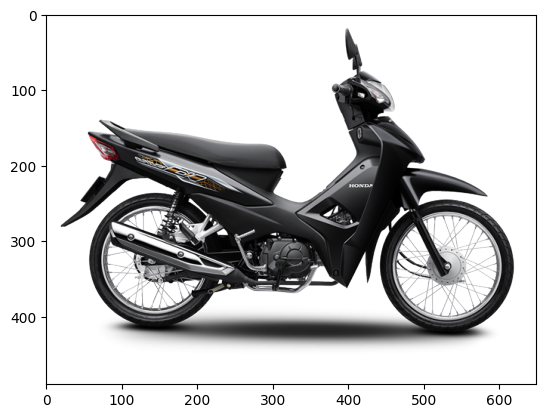

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/f14.h5')
uploaded=files.upload()



for fn in uploaded.keys():

  path='/content/'+fn
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path, target_size=(100, 100))
  x=image.img_to_array(img)
  x=np.expand_dims (x,axis=0)
  y_predict = model.predict(x, batch_size=10)

  print(y_predict)
  print("--------------------------------------------------------------------")
  print()
  print()

  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])
